## 22. 瞭解股票交易資料

2018.09.19  2330 範例： （時間至微秒）

時間             股票代號   成交價    成交量  成交總量 
點 分 秒          
09:00:00.777235, 2330,     258.000,  2762,   2762

[實際資料內容格式]
090000777235,2330,258.000,2762,2762
090005791381,2330,257.500,88,2850
090010806555,2330,258.000,138,2988
090015821739,2330,257.500,85,3073
090020836945,2330,257.500,27,3100
090025851056,2330,258.000,80,3180

每5秒集中 搓合

## 23.取用股票成交資料 -->           變數名稱＝open( '檔案名稱' ).readlines()

In [8]:
HData=open('Stock_Tick/20180919_Stock.csv','r').readlines()
HData[:3]

['090000117365,2509,31.000,1,1\n',
 '090000117365,00633L,34.390,2778,2778\n',
 '090000117365,2881B,60.900,1,1\n']

In [9]:
type(HData)

list

In [10]:
[line.strip('\n') for line in HData] [:3]  # 去掉 \n 

['090000117365,2509,31.000,1,1',
 '090000117365,00633L,34.390,2778,2778',
 '090000117365,2881B,60.900,1,1']

In [11]:
MData=[line.strip('\n') .split(',') for line in HData]    # 去掉 \n  , 以『,』分隔 
MData[:3]

[['090000117365', '2509', '31.000', '1', '1'],
 ['090000117365', '00633L', '34.390', '2778', '2778'],
 ['090000117365', '2881B', '60.900', '1', '1']]

## 取10點以前交易的資料

In [13]:
MData_1=[line for line in MData if int(line[0])<100000000000]
MData_1[-10:]

[['095959786652', '6128', '31.550', '2', '19'],
 ['095959786652', '4552', '60.300', '1', '613'],
 ['095959786652', '2382', '52.900', '56', '1478'],
 ['095959786652', '5264', '52.600', '7', '235'],
 ['095959904539', '1909', '22.150', '1', '1559'],
 ['095959904539', '2633', '26.150', '4', '1118'],
 ['095959904539', '3048', '15.700', '1', '95'],
 ['095959987250', '2820', '14.000', '1', '90'],
 ['095959987250', '2885', '15.300', '1', '5575'],
 ['095959987250', '6278', '34.150', '5', '4138']]

## 取得特定股票代號的資訊

In [14]:
MData_2=[line for line in MData if line[1]=='2330']
MData_2[:10]

[['090000777235', '2330', '258.000', '2762', '2762'],
 ['090005791381', '2330', '257.500', '88', '2850'],
 ['090010806555', '2330', '258.000', '138', '2988'],
 ['090015821739', '2330', '257.500', '85', '3073'],
 ['090020836945', '2330', '257.500', '27', '3100'],
 ['090025851056', '2330', '258.000', '80', '3180'],
 ['090030866234', '2330', '258.000', '105', '3285'],
 ['090035879362', '2330', '257.500', '38', '3323'],
 ['090040893251', '2330', '258.000', '18', '3341'],
 ['090045909737', '2330', '258.000', '15', '3356']]

## 呼叫 Function    範例： backtest_function.py 

In [15]:
import backtest_function
Data=backtest_function.GetHistoryData('20180903','2330')   #讀取回測資料
Data[0]

['090000378911', '2330', '259.000', '2357', '2357']

## backtest_function.py 

import numpy
import datetime
from os import listdir


def DayList(path='Stock_Tick'):
    data_list = listdir(path)
    day_list = [ i[:8] for i in data_list ]
    return day_list

def GetHistoryData(date,sid):
    HData = open('Stock_Tick/'+date+'_Stock.csv').readlines()
    MData = [ line.strip('\n').split(',') for line in HData ]
    MData_1 = [ line for line in MData if line[1] == sid ]
    return MData_1

    
def GetHistoryKBar(date,sid):
    Data = GetHistoryData(date,sid)
    #定義相關變數
    KBar = []
    InitTime = datetime.datetime.strptime(date+'090000000000',"%Y%m%d%H%M%S%f")
    Cycle = 60
    #開始進行K線計算
    for i in range(len(Data)):
        time=datetime.datetime.strptime(date+Data[i][0],"%Y%m%d%H%M%S%f")
        price=float(Data[i][2])
        qty=int(Data[i][3])
        if len(KBar)==0:
            KBar.append([InitTime,price,price,price,price,qty])
        else:
            if time < InitTime + datetime.timedelta(0,Cycle):
                if price > KBar[-1][2]:
                    KBar[-1][2] = price
                elif price < KBar[-1][3]:
                    KBar[-1][3] = price
                KBar[-1][4] = price
                KBar[-1][5] += qty
            else:
                InitTime += datetime.timedelta(0,Cycle)
                KBar.append([InitTime,price,price,price,price,qty])
    return KBar

def GetHistoryTAKBar(date,sid):
    KBar = GetHistoryKBar(date,sid)
    TAKBar={}
    TAKBar['time']=numpy.array([ line[0] for line in KBar ])
    TAKBar['open']=numpy.array([ line[1] for line in KBar ])
    TAKBar['high']=numpy.array([ line[2] for line in KBar ])
    TAKBar['low']=numpy.array([ line[3] for line in KBar ])
    TAKBar['close']=numpy.array([ line[4] for line in KBar ])
    TAKBar['volumn']=numpy.array([ line[5] for line in KBar ])
    return TAKBar

## 24.  pip install matplotlib 安裝基本繪圖套件
 python 命令模式下  >pip install matplotlib 

## 25. 繪製價格折線圖     plot_date()  , plt.subplot(111) => 111表示row:1  col:1 index從1開始

python 25.py 20180903 3008

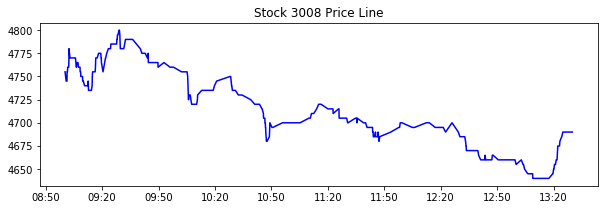

In [16]:
#載入相關套件及函數
import sys
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
from backtest_function import GetHistoryData

#將日期以及股票代碼變成參數帶入 (適用於 cmd 環境 下指令： >python 25.py 20180903 3008 
#date=sys.argv[1]
#stockid=sys.argv[2]

date='20180903'
stockid='3008'

#取得成交資訊
Data = GetHistoryData(date,stockid)   # backtest_function

#取得轉換時間字串至時間格式
Time = [ datetime.datetime.strptime(line[0],"%H%M%S%f") for line in Data ]

#將datetime時間格式轉換為繪圖專用的時間格式，透過mdates.date2num函數
Time1 = [ mdates.date2num(line) for line in Time ]

#價格由字串轉數值
Price = [ float(line[2]) for line in Data ]

#定義圖表物件
ax = plt.figure(1,figsize=(10,3)) 		#第一張圖片              
ax = plt.subplot(111)	#該張圖片僅一個圖案
#以上兩行，可簡寫如下一行
#fig,ax = plt.subplots()

#繪製圖案
#plot_date(X軸物件, Y軸物件, 線風格)
ax.plot_date(Time1, Price, 'b-')

#定義title
plt.title('Stock '+stockid+' Price Line')

#定義x軸
hfmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(hfmt)

#顯示繪製圖表
plt.show()


## 分解說明 :

In [17]:
#載入相關套件及函數
import sys
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
from backtest_function import GetHistoryData

#將日期以及股票代碼變成參數帶入 (適用於 cmd 環境 下指令： >python 25.py 20180903 3008 
#date=sys.argv[1]
#stockid=sys.argv[2]

date='20180903'
stockid='3008'

#取得成交資訊
Data = GetHistoryData(date,stockid)
Data[:3]

[['090014438995', '3008', '4755.000', '7', '7'],
 ['090049580802', '3008', '4745.000', '1', '8'],
 ['090059671871', '3008', '4745.000', '1', '9']]

In [18]:
InitTime = datetime.datetime.strptime('090000000000',"%H%M%S%f")
InitTime

datetime.datetime(1900, 1, 1, 9, 0)

In [19]:
#取得轉換時間字串至時間格式
Time = [ datetime.datetime.strptime(line[0],"%H%M%S%f") for line in Data ]
#將datetime時間格式轉換為繪圖 Matplotlib 專用的時間格式，透過mdates.date2num函數
Time1 = [ mdates.date2num(line) for line in Time ]
Time[:3]

[datetime.datetime(1900, 1, 1, 9, 0, 14, 438995),
 datetime.datetime(1900, 1, 1, 9, 0, 49, 580802),
 datetime.datetime(1900, 1, 1, 9, 0, 59, 671871)]

In [20]:
#價格由字串轉數值
Price = [ float(line[2]) for line in Data ]
Price[:3]

[4755.0, 4745.0, 4745.0]

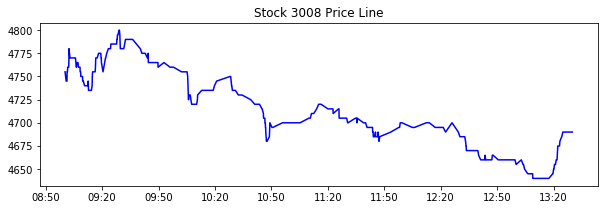

In [21]:
#定義圖表物件
ax = plt.figure(1,figsize=(10,3)) 		#第一張圖片              
ax = plt.subplot(111)	#該張圖片僅一個圖案
#以上兩行，可簡寫如下一行
#fig,ax = plt.subplots()

#繪製圖案
#plot_date(X軸物件, Y軸物件, 線風格)
ax.plot_date(Time1, Price, 'b-')
#定義title
plt.title('Stock '+stockid+' Price Line')
#定義x軸
hfmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(hfmt)

#顯示繪製圖表
plt.show()

## 26.  MA移動平均線，10分MA：前10分鐘『每分鐘』『收盤價』計算平均數

## 27. 逐筆計算移動平均價格  MA   (10分MA)   :  MA=(V1+V2+....+Vn)/n , Vi為i分前的收盤價  
本範例自行撰寫演算法，之後會用Talib套件

python 27.py 20180903 2330

In [22]:
#載入相關套件及函數
import sys
import datetime
from backtest_function import GetHistoryData

#將日期以及股票代碼變成參數帶入
# date=sys.argv[1]
# stockid=sys.argv[2]
date='20180903'
stockid='2330'

#取得成交資訊
Data = GetHistoryData(date,stockid)

#定義相關變數
MAarray = []
MA = []
MAValue = 0
InitTime = datetime.datetime.strptime('090000000000',"%H%M%S%f")   # 台股 09:00開始交易
Cycle = 60  # 60秒
MAlen = 10  # 10分

#開始進行MA計算
for i in Data:
    time=datetime.datetime.strptime(i[0],"%H%M%S%f")    #第1欄位:時間 , 第2欄位：股票代號 , 第3欄位：成交價
    price=float(i[2])                                   
    if len(MAarray)==0:
        MAarray+=[price]                               # 例 M=[0,1,] P=2, M+=[P]   => M=[0,1,2]
    else:
        if time < InitTime + datetime.timedelta(0,Cycle):  #每分鐘的最後收盤價 
            MAarray[-1]=price
        else:
            if len(MAarray)==MAlen:
                MAarray=MAarray[1:]+[price]             #例 M=[0,1,2,3,4] P=5, M=M[1:]+[P]  => M=[1,2,3,4,5]
            else:
                MAarray+=[price]                        # 例 M=[0,1,2,3] P=4, M+=[P]   => M=[0,1,2,3,4]
            InitTime += datetime.timedelta(0,Cycle)
    MAValue=float(sum(MAarray))/len(MAarray)            # 例 M=[1,2,3,4,5]  MV=float(sum(M))/len(M)  =>MV=3 
    MA.append([time.strftime("%H:%M:%S"),MAValue])

print(MA)

[['09:00:00', 259.0], ['09:00:05', 259.0], ['09:00:10', 259.0], ['09:00:15', 258.5], ['09:00:20', 259.0], ['09:00:25', 258.5], ['09:00:30', 259.0], ['09:00:35', 259.0], ['09:00:40', 259.0], ['09:00:45', 258.5], ['09:00:50', 259.0], ['09:00:55', 259.0], ['09:01:00', 259.0], ['09:01:05', 259.0], ['09:01:10', 259.0], ['09:01:15', 259.0], ['09:01:20', 259.0], ['09:01:25', 259.0], ['09:01:30', 259.0], ['09:01:35', 259.0], ['09:01:40', 259.0], ['09:01:45', 259.0], ['09:01:50', 259.0], ['09:01:55', 259.0], ['09:02:00', 259.1666666666667], ['09:02:05', 259.1666666666667], ['09:02:10', 259.1666666666667], ['09:02:15', 259.1666666666667], ['09:02:21', 259.1666666666667], ['09:02:26', 259.1666666666667], ['09:02:31', 259.1666666666667], ['09:02:36', 259.1666666666667], ['09:02:41', 259.1666666666667], ['09:02:46', 259.3333333333333], ['09:02:51', 259.1666666666667], ['09:02:56', 259.1666666666667], ['09:03:01', 259.25], ['09:03:06', 259.25], ['09:03:11', 259.375], ['09:03:16', 259.25], ['09:03:21

In [24]:
M=[1,2,3,4]
P=5
P2=6

In [25]:
M+=[P]

In [26]:
M

[1, 2, 3, 4, 5]

In [27]:
M=M[1:]+[P2]

In [28]:
M

[2, 3, 4, 5, 6]

In [29]:
MV=float(sum(M))/len(M)
MV

4.0

## 28. 繪製『價格』與『MA』重疊圖表    (一個圖表，多個圖像)

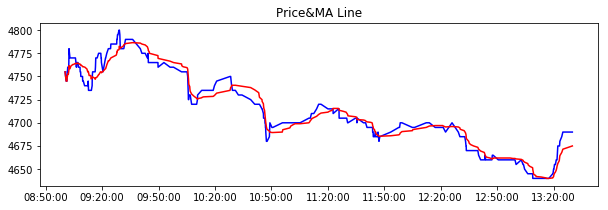

In [30]:
#載入相關套件及函數
import sys
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
from backtest_function import GetHistoryData

#將日期以及股票代碼變成參數帶入
# date=sys.argv[1]
# stockid=sys.argv[2]
date='20180903'
stockid='3008'

#取得成交資訊
Data = GetHistoryData(date,stockid)

#定義相關變數
MAarray = []
MA = []
MAValue = 0
InitTime = datetime.datetime.strptime('090000000000',"%H%M%S%f")
Cycle = 60
MAlen = 10

#開始進行MA計算
for i in Data:
    time=datetime.datetime.strptime(i[0],"%H%M%S%f")
    price=float(i[2])
    if len(MAarray)==0:
        MAarray+=[price]
    else:
        if time < InitTime + datetime.timedelta(0,Cycle):
            MAarray[-1]=price
        else:
            if len(MAarray)==MAlen:
                MAarray=MAarray[1:]+[price]
            else:
                MAarray+=[price]   
            InitTime += datetime.timedelta(0,Cycle)
    MAValue=float(sum(MAarray))/len(MAarray)
    MA.append(MAValue)

#開始進行繪圖
#取得轉換時間字串至時間格式
Time = [ datetime.datetime.strptime(line[0],"%H%M%S%f") for line in Data ]
#將datetime時間格式轉換為繪圖專用的時間格式，透過mdates.date2num函數
Time1 = [ mdates.date2num(line) for line in Time ]
#價格由字串轉數值
Price = [ float(line[2]) for line in Data ]

#定義圖表物件
ax = plt.figure(1,figsize=(10,3))              
ax = plt.subplot(111)
#以上兩行，可簡寫如下一行
#fig,ax = plt.subplots()

#定義title
plt.title('Price&MA Line')

# 繪製價格折線圖
ax.plot_date(Time1, Price, 'b-')
# 繪製MA折線圖
ax.plot_date(Time1, MA, 'r-')

#定義x軸
hfmt = mdates.DateFormatter('%H:%M:%S')
ax.xaxis.set_major_formatter(hfmt)

# 顯示繪製圖表
plt.show()


## 29. 繪製『價格線圖』與『量能』表 
## 量能圖-> 直方圖呈現 ->  bar()

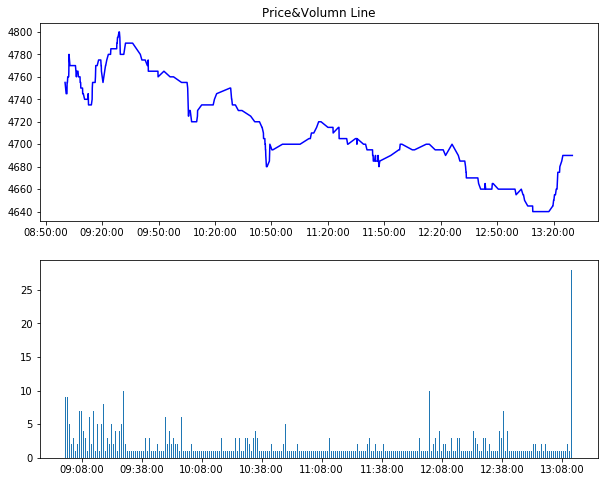

In [31]:
#載入相關套件及函數
import sys
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
from backtest_function import GetHistoryData

#將日期以及股票代碼變成參數帶入
#date=sys.argv[1]
#stockid=sys.argv[2]
date='20180903'
stockid='3008'

#取得成交資訊
Data = GetHistoryData(date,stockid)

#定義相關變數
Volumn = []
InitTime = datetime.datetime.strptime('090000000000',"%H%M%S%f")
Cycle = 60

#開始進行量能計算
for i in range(len(Data)):
    time=datetime.datetime.strptime(Data[i][0],"%H%M%S%f")
    qty=int(Data[i][3])
    if len(Volumn)==0:
        Volumn.append([InitTime,qty])
    else:
        if time < InitTime + datetime.timedelta(0,Cycle):
            Volumn[-1][1] += qty
        else:
            InitTime += datetime.timedelta(0,Cycle)
            Volumn.append([InitTime,qty])

#開始進行繪圖
#取得轉換時間字串至時間格式
Time = [ datetime.datetime.strptime(line[0],"%H%M%S%f") for line in Data ]
#將datetime時間格式轉換為繪圖專用的時間格式，透過mdates.date2num函數
Time1 = [ mdates.date2num(line) for line in Time ]
#價格由字串轉數值
Price = [ float(line[2]) for line in Data ]

#定義圖表物件
fig = plt.figure(1,figsize=(10,8))              
ax1 = fig.add_subplot(211)

#定義title
plt.title('Price&Volumn Line')

# 繪製價格折線圖
ax1.plot_date(Time1, Price, 'b-')

#取得轉換時間字串至時間格式
QTime=[ line[0] for line in Volumn ]
#將datetime時間格式轉換為繪圖專用的時間格式，透過mdates.date2num函數
QTime1 = [ mdates.date2num(line) for line in QTime ]
#取出量能的list
QValue=[ line[1] for line in Volumn ]

#定義第二張圖案在圖表的位置
ax2 = fig.add_subplot(212)
# 透過直方圖來進行量能繪製
ax2.bar(QTime, QValue,width=0.0003)
#透過直線圖，也能夠達成相同效果，程式碼如下
#ax2.vlines(QTime,[0],QValue)

#定義x軸
hfmt = mdates.DateFormatter('%H:%M:%S')
ax1.xaxis.set_major_formatter(hfmt)
ax2.xaxis.set_major_formatter(hfmt)

# 顯示繪製圖表
plt.show()


## 31.繪製『價格』與『內外』盤走勢圖 
## 　（賣盤：『內盤』 ，  賣盤：『外盤』)

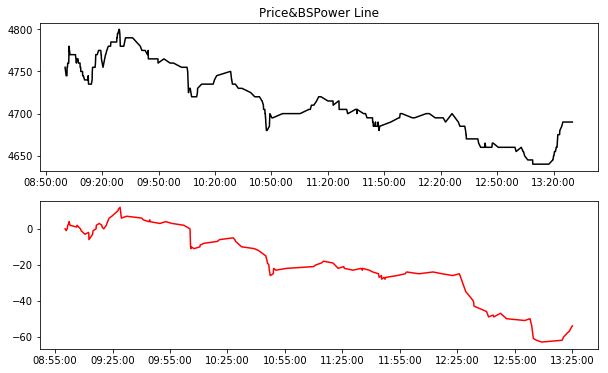

In [32]:
#載入相關套件及函數
import sys
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
from backtest_function import GetHistoryData

#將日期以及股票代碼變成參數帶入
#date=sys.argv[1]
#stockid=sys.argv[2]

date='20180903'
stockid='3008'

#取得成交資訊
Data = GetHistoryData(date,stockid)


#定義相關變數
BSpower = [ [ datetime.datetime.strptime(Data[0][0],"%H%M%S%f") , 0 ] ]

#開始進行內外盤計算
for i in range(1,len(Data)):
    time=datetime.datetime.strptime(Data[i][0],"%H%M%S%f")
    price=float(Data[i][2])
    lastprice=float(Data[i-1][2])
    qty=int(Data[i][3])
    if price>lastprice:
        BSpower.append([ time , BSpower[-1][1] + qty ])      #成交價 > 前一筆成交價 ＝> ＋交易量
    elif price<lastprice:
        BSpower.append([ time , BSpower[-1][1] - qty ])      #成交價 > 前一筆成交價 ＝> -交易量

# print(BSpower)            
            
#開始進行繪圖
#取得轉換時間字串至時間格式
Time = [ datetime.datetime.strptime(line[0],"%H%M%S%f") for line in Data ]
#將datetime時間格式轉換為繪圖專用的時間格式，透過mdates.date2num函數
Time1 = [ mdates.date2num(line) for line in Time ]
#價格由字串轉數值
Price = [ float(line[2]) for line in Data ]

#定義圖表物件
fig = plt.figure(1,figsize=(10,6)) 		#第一張圖片              
ax1 = fig.add_subplot(211)

#定義title
plt.title('Price&BSPower Line')

# 繪製價格折線圖
ax1.plot_date(Time1, Price, 'k-')

#取得轉換時間字串至時間格式
STime=[ line[0] for line in BSpower ]
#print(STime)

#將datetime時間格式轉換為繪圖專用的時間格式，透過mdates.date2num函數
STime1 = [ mdates.date2num(line) for line in STime ]
#取出量能的list
SValue=[ line[1] for line in BSpower ]

#定義第二張圖案在圖表的位置
ax2 = fig.add_subplot(212)
# 繪製內外盤量走勢圖
ax2.plot_date(STime1, SValue, 'r-')

#定義x軸
hfmt = mdates.DateFormatter('%H:%M:%S')
ax1.xaxis.set_major_formatter(hfmt)
ax2.xaxis.set_major_formatter(hfmt)

# 顯示繪製圖表
plt.show()


## 32.繪製『價格』以及『標記大單』位置
##  32-1   單筆『成交價值』高於某的特定價值，該筆成交資訊進行標記
股票價格x1000x成交量

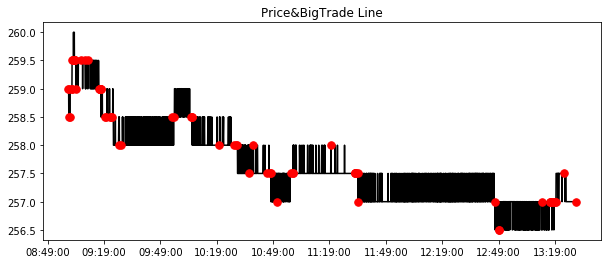

In [33]:
#載入相關套件及函數
import sys
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
from backtest_function import GetHistoryData

#將日期以及股票代碼變成參數帶入
#date=sys.argv[1]
#stockid=sys.argv[2]

date='20180903'
stockid='2330'

#取得成交資訊
Data = GetHistoryData(date,stockid)

#定義相關變數
BigTrade = []
BigValue= 10000000

#開始進行內外盤計算
for i in range(1,len(Data)):
    time=datetime.datetime.strptime(Data[i][0],"%H%M%S%f")
    price=float(Data[i][2])
    qty=int(Data[i][3])
    value=price*1000*qty
    if value > BigValue :
        BigTrade.append([ time , price ])

# print(BigTrade)            
            
#開始進行繪圖
#取得轉換時間字串至時間格式
Time = [ datetime.datetime.strptime(line[0],"%H%M%S%f") for line in Data ]
#將datetime時間格式轉換為繪圖專用的時間格式，透過mdates.date2num函數
Time1 = [ mdates.date2num(line) for line in Time ]
#價格由字串轉數值
Price = [ float(line[2]) for line in Data ]

#定義圖表物件
fig = plt.figure(1,figsize=(10,4))  
ax = plt.subplot(111)

#定義title
plt.title('Price&BigTrade Line')

# 繪製價格折線圖
ax.plot_date(Time1, Price, 'k-')

if len(BigTrade)!=0:
    #取得轉換時間字串至時間格式
    STime=[ line[0] for line in BigTrade ]
    #將datetime時間格式轉換為繪圖專用的時間格式，透過mdates.date2num函數
    STime1 = [ mdates.date2num(line) for line in STime ]
    #取出量能的list
    SValue=[ line[1] for line in BigTrade ]
    #繪製出
    ax.plot_date(STime1, SValue, 'r.',markersize='15')   ## markersize 設定標註點大小

#定義x軸
hfmt = mdates.DateFormatter('%H:%M:%S')
ax.xaxis.set_major_formatter(hfmt)

# 顯示繪製圖表
plt.show()


## 32-2   每一個大單進行『買方』或『賣方』力道的判斷 , 紅色(買方), 綠色(賣方)

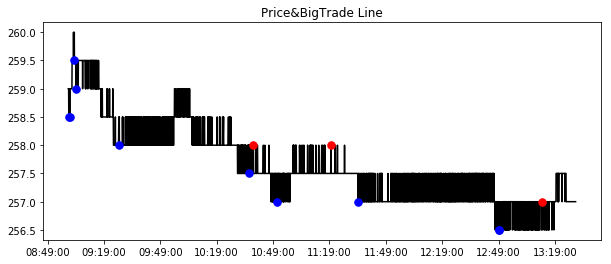

In [34]:
#載入相關套件及函數
import sys
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
from backtest_function import GetHistoryData

#將日期以及股票代碼變成參數帶入
#date=sys.argv[1]
#stockid=sys.argv[2]

date='20180903'
stockid='2330'

#取得成交資訊
Data = GetHistoryData(date,stockid)

#定義相關變數
BigBTrade = []
BigSTrade = []
BigValue= 10000000

#開始進行內外盤計算
for i in range(1,len(Data)):
    time=datetime.datetime.strptime(Data[i][0],"%H%M%S%f")
    price=float(Data[i][2])
    lastprice=float(Data[i-1][2])
    qty=int(Data[i][3])
    value=price*1000*qty
    if value > BigValue :
        if price>lastprice:                    
            BigBTrade.append([ time , price ])   ##買方 Big_Btrade
        elif price<lastprice:
            BigSTrade.append([ time , price ])   ##賣方 Big_Strade
        
#開始進行繪圖
#取得轉換時間字串至時間格式賣方
Time = [ datetime.datetime.strptime(line[0],"%H%M%S%f") for line in Data ]
#將datetime時間格式轉換為繪圖專用的時間格式，透過mdates.date2num函數
Time1 = [ mdates.date2num(line) for line in Time ]
#價格由字串轉數值
Price = [ float(line[2]) for line in Data ]

#定義圖表物件
fig = plt.figure(1,figsize=(10,4))  
ax = plt.subplot(111)

#定義title
plt.title('Price&BigTrade Line')

# 繪製價格折線圖
ax.plot_date(Time1, Price, 'k-')

# 繪製買方大單點位
if len(BigBTrade)!=0:
    #取得轉換時間字串至時間格式
    BTime=[ line[0] for line in BigBTrade ]
    #將datetime時間格式轉換為繪圖專用的時間格式，透過mdates.date2num函數
    BTime1 = [ mdates.date2num(line) for line in BTime ]
    #取出量能的list
    BValue=[ line[1] for line in BigBTrade ]
    # 將大單點位繪製出來
    ax.plot_date(BTime1, BValue, 'r.',markersize='15')

# 繪製賣方大單點位
if len(BigSTrade)!=0:
    #取得轉換時間字串至時間格式
    STime=[ line[0] for line in BigSTrade ]
    #將datetime時間格式轉換為繪圖專用的時間格式，透過mdates.date2num函數
    STime1 = [ mdates.date2num(line) for line in STime ]
    #取出量能的list
    SValue=[ line[1] for line in BigSTrade ]
    # 將大單點位繪製出來
    ax.plot_date(STime1, SValue, 'b.',markersize='15')

#定義x軸
hfmt = mdates.DateFormatter('%H:%M:%S')
ax.xaxis.set_major_formatter(hfmt)

# 顯示繪製圖表
plt.show()


## 34. 計算K線指標    (K線呈現一個時間區段的數值資訊)

##   K線資料欄位：時間、開盤價、最高價、最低價、收盤價、累計成交量
##  Cycle=60 -> 1分K棒   ,     Cycle=300  -> 5分K棒    

In [35]:
#載入相關套件及函數
import sys
import datetime
from backtest_function import GetHistoryData

#將日期以及股票代碼變成參數帶入
#date=sys.argv[1]
#stockid=sys.argv[2]

date='20180903'
stockid='2330'

#取得成交資訊
Data = GetHistoryData(date,stockid)

#定義相關變數 , Cycle=秒
KBar = []
InitTime = datetime.datetime.strptime('090000000000',"%H%M%S%f")
Cycle = 60     ## 60秒  =1分

#開始進行K線計算
for i in range(len(Data)):
    time=datetime.datetime.strptime(Data[i][0],"%H%M%S%f")
    price=float(Data[i][2])
    qty=int(Data[i][3])
    if len(KBar)==0:
        KBar.append([InitTime,price,price,price,price,qty])    #時間、開盤價、最高價、最低價、收盤價、累計成交量
    else:
        if time < InitTime + datetime.timedelta(0,Cycle):
            if price > KBar[-1][2]:        #最高價  
                KBar[-1][2] = price
            elif price < KBar[-1][3]:      #最低價
                KBar[-1][3] = price
            KBar[-1][4] = price            #收盤價
            KBar[-1][5] += qty             #累計成交價
        else:
            InitTime += datetime.timedelta(0,Cycle)     
            KBar.append([InitTime,price,price,price,price,qty])

print(KBar)


[[datetime.datetime(1900, 1, 1, 9, 0), 259.0, 259.0, 258.5, 259.0, 2682], [datetime.datetime(1900, 1, 1, 9, 1), 259.0, 259.0, 259.0, 259.0, 333], [datetime.datetime(1900, 1, 1, 9, 2), 259.5, 260.0, 259.5, 259.5, 500], [datetime.datetime(1900, 1, 1, 9, 3), 259.5, 260.0, 259.5, 259.5, 465], [datetime.datetime(1900, 1, 1, 9, 4), 259.0, 259.5, 259.0, 259.5, 178], [datetime.datetime(1900, 1, 1, 9, 5), 259.0, 259.5, 259.0, 259.5, 92], [datetime.datetime(1900, 1, 1, 9, 6), 259.5, 259.5, 259.5, 259.5, 116], [datetime.datetime(1900, 1, 1, 9, 7), 259.5, 259.5, 259.0, 259.5, 115], [datetime.datetime(1900, 1, 1, 9, 8), 259.5, 259.5, 259.5, 259.5, 158], [datetime.datetime(1900, 1, 1, 9, 9), 259.5, 259.5, 259.0, 259.5, 46], [datetime.datetime(1900, 1, 1, 9, 10), 259.5, 259.5, 259.0, 259.5, 148], [datetime.datetime(1900, 1, 1, 9, 11), 259.5, 259.5, 259.0, 259.5, 85], [datetime.datetime(1900, 1, 1, 9, 12), 259.0, 259.5, 259.0, 259.5, 123], [datetime.datetime(1900, 1, 1, 9, 13), 259.5, 259.5, 259.0, 25

## 35.繪製K線圖

以往只需透過matplotlib.finance, 不過在Python 3.6版matplotlib(ver 2.2)已不包含
## 先安裝套件『mpl_finance』,
## 不在 pip 預設的安裝清單  ,
pip install https://github.com/matplotlib/mpl_finance/archive/master.zip

In [36]:
import mpl_finance

## 35-1     -- candlestick_ohlc   ,  candlestick2_ohlc


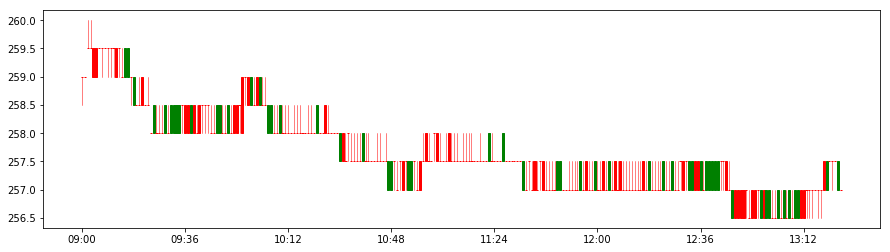

In [37]:
#載入相關套件及函數
import sys
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from mpl_finance import candlestick_ohlc
import datetime
from backtest_function import GetHistoryKBar

#將日期以及股票代碼變成參數帶入
#date=sys.argv[1]
#stockid=sys.argv[2]

date='20180903'
stockid='2330'

#取得成交資訊
Data = GetHistoryKBar(date,stockid)

#將第一個欄位調整成繪圖格式
KBar = [ [mdates.date2num(line[0]),line[1],line[2],line[3],line[4],line[5]] for line in Data ]  ##下載範例有錯 KBar ->Data

#定義圖表物件
fig = plt.figure(1,figsize=(15,4))  
#定義第一張圖案在圖表的位置
ax1 = fig.add_subplot(111)

#繪製K線圖
candlestick_ohlc(ax1, KBar, width=0.0005, colorup='r', colordown='g')  #漲->紅色   跌->綠色

#定義x軸時間格式
hfmt = mdates.DateFormatter('%H:%M')
ax1.xaxis.set_major_formatter(hfmt)     #橫座標設置時間格式

plt.show()


## 35-2   加上每分鐘『量』

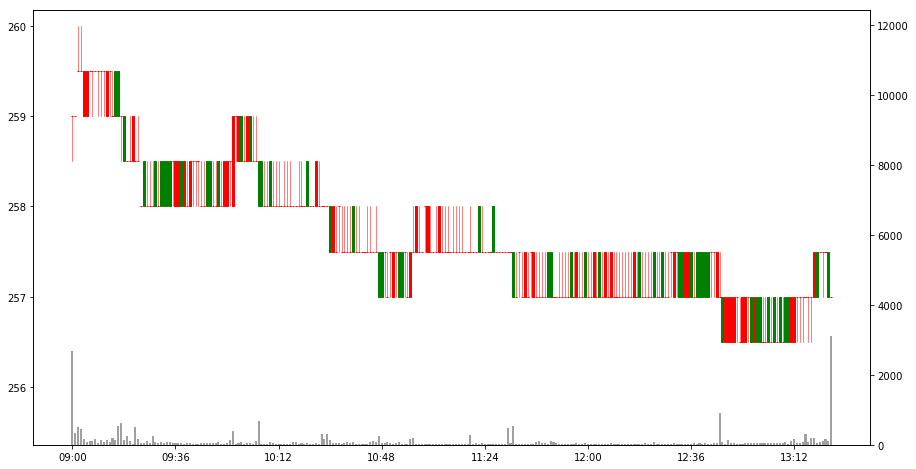

In [38]:
#載入相關套件及函數
import sys
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from mpl_finance import candlestick_ohlc
import datetime
from backtest_function import GetHistoryKBar

#將日期以及股票代碼變成參數帶入
#date=sys.argv[1]
#stockid=sys.argv[2]

date='20180903'
stockid='2330'

#取得成交資訊
Data = GetHistoryKBar(date,stockid)

#將第一個欄位調整成繪圖格式
KBar = [ [mdates.date2num(line[0]),line[1],line[2],line[3],line[4],line[5]] for line in Data ] ##下載範例有錯 KBar ->Data

#定義圖表物件
fig = plt.figure(1,figsize=(15,8))  
#定義第一張圖案在圖表的位置
ax1 = fig.add_subplot(111)

#繪製K線圖
candlestick_ohlc(ax1, KBar, width=0.0005, colorup='r', colordown='g')

#設定K線圖佔圖表版面比例
pad = 0.25
yl = ax1.get_ylim()
ax1.set_ylim(yl[0]-(yl[1]-yl[0])*pad,yl[1])

#定義時間陣列、量陣列
Time= [ line[0] for line in KBar ]
Qty= [ line[5] for line in KBar ]

#設定兩張圖表重疊
ax2 = ax1.twinx()
#繪製量能圖
ax2.bar(Time, Qty, color='gray', width = 0.0005, alpha = 0.75)
#將量能圖定位在K線圖下方
ax2.set_ylim([0,max(Qty)*4])

#定義x軸時間格式
hfmt = mdates.DateFormatter('%H:%M')
ax1.xaxis.set_major_formatter(hfmt)

plt.show()


> python 35-2.py 20180903 2330